In [7]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [8]:
np.random.seed(0)
df = pd.DataFrame(
    data = {
        'Feature' : np.arange(1,101),
        'Target'  : np.array([0]*60 + [1]*40)
    }
)
df.head()

,Feature,Target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


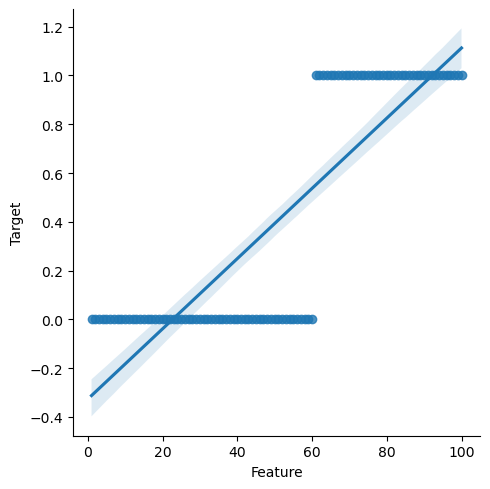

In [9]:
sns.lmplot(data=df, x='Feature', y='Target')

In [10]:
df_jitter = df.copy()
df_jitter['Target'] = df_jitter['Target'] + np.random.normal(0,0.03, size=len(df))
df_jitter['Target'] = df_jitter['Target'].clip(0,1)

RuntimeError: `logistic=True` requires statsmodels, an optional dependency, to be installed.

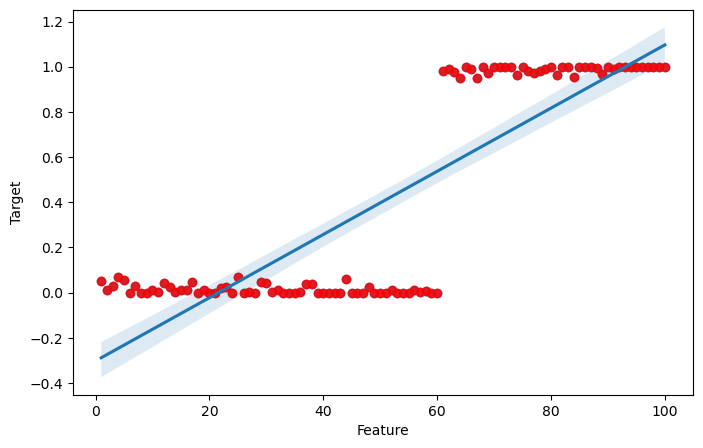

In [11]:
plt.figure(figsize=(8,5))

sns.regplot(
    x='Feature',
    y='Target',
    data=df_jitter,
    label='Linear Regression'
)

sns.regplot(
    x='Feature',
    y='Target',
    data=df_jitter,
    logistic=True,
    color='red',
)

plt.legend()
plt.show()

In [12]:
data = pd.read_csv('./titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data['Pclass'].unique()

array([3, 1, 2])

In [ ]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [ ]:
data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

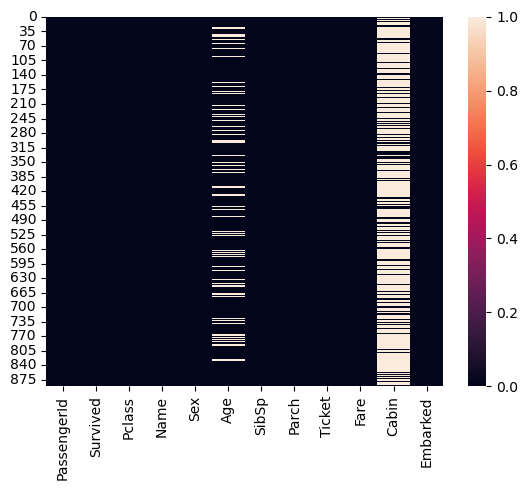

In [ ]:
sns.heatmap(data.isnull())

<Axes: >

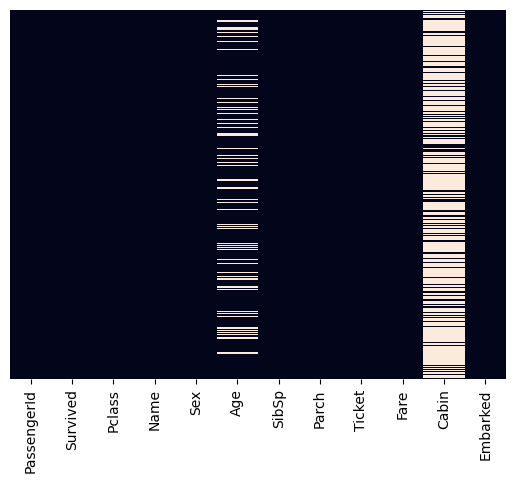

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

In [ ]:
data.drop(columns=['Cabin'], inplace=True)

<Axes: >

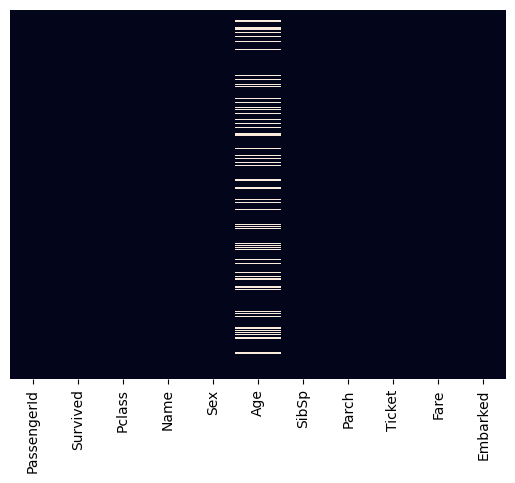

In [ ]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False)

<Axes: xlabel='Sex', ylabel='Age'>

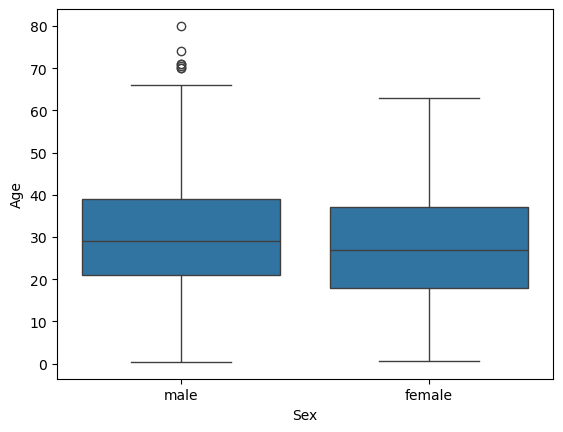

In [ ]:
sns.boxplot(data=data, x='Sex', y='Age')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
data['Pclass'].unique()

array([3, 1, 2])

<Axes: xlabel='Pclass', ylabel='Age'>

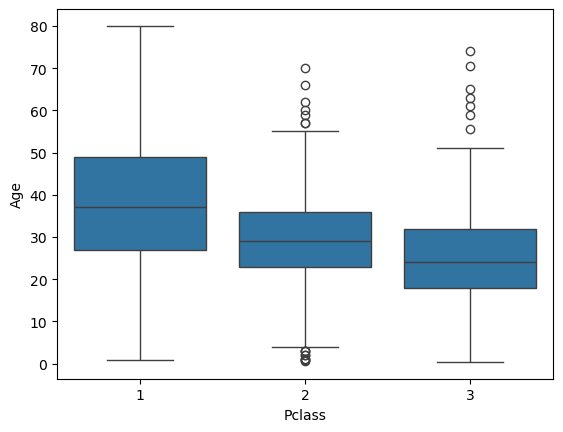

In [15]:
sns.boxplot(data=data, x='Pclass', y='Age')

In [16]:
pclass_1_median = data[data['Pclass'] == 1]['Age'].median()
pclass_2_median = data[data['Pclass'] == 2]["Age"].median()
pclass_3_median = data[data['Pclass'] ==3]['Age'].median()
pclass_1_median, pclass_2_median, pclass_3_median

(37.0, 29.0, 24.0)

In [17]:
data.groupby('Pclass')['Age'].median()


Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [23]:
def fill_age(columns):
    age = columns['Age']
    pclass = columns['Pclass']

    if pd.isnull(age):
        if pclass == 1:
            return pclass_1_median
        elif pclass == 2:
            return pclass_2_median
        else:
            return pclass_3_median
        
    else:
        return age

In [24]:
data['age'] = data[['Age', 'Pclass']].apply(fill_age, axis=1)

In [25]:
data.dropna(inplace=True)


data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
 12  age          183 non-null    float64
dtypes: float64(3), int64(5), object(5)
memory usage: 20.0+ KB


In [26]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,54.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,4.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,58.0


In [27]:
data.drop(
    columns=['PassengerId', 'Name', 'Ticket'],
    inplace=True
)

In [28]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,age
1,1,1,female,38.0,1,0,71.2833,C85,C,38.0
3,1,1,female,35.0,1,0,53.1000,C123,S,35.0
6,0,1,male,54.0,0,0,51.8625,E46,S,54.0
10,1,3,female,4.0,1,1,16.7000,G6,S,4.0
11,1,1,female,58.0,0,0,26.5500,C103,S,58.0


<Axes: xlabel='Survived', ylabel='count'>

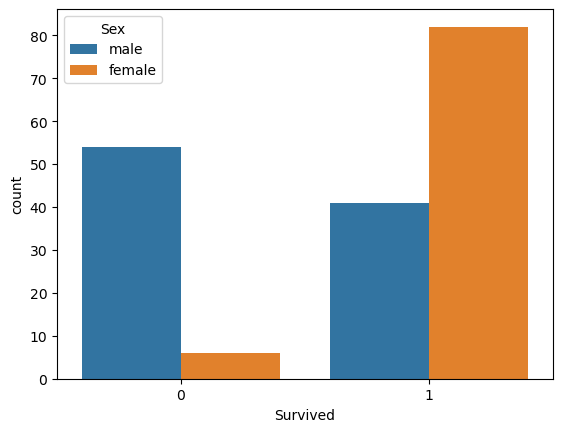

In [31]:
sns.countplot(data=data, x='Survived' , hue='Sex')